Testing a simple system class, seeing if it can deduce the system true and sensed states from a set of sensed component objects

In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.SensedComp import SensedComp
from shipClass.System import System

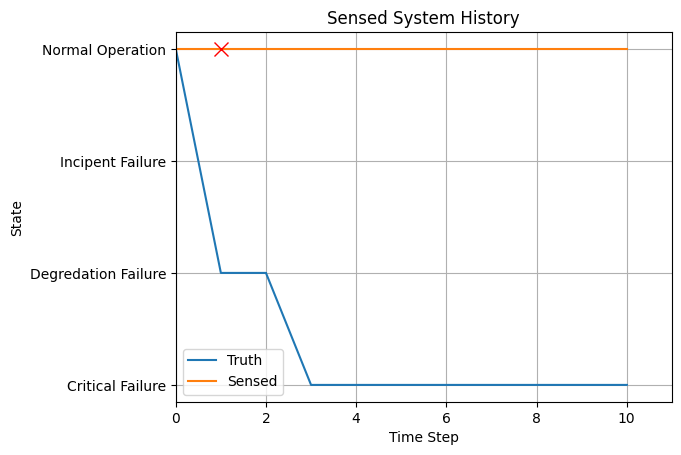

In [2]:
# create one high reliability component and two low-reliability ones
states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

high_rel_mat = [[1, 0, 0, 0], 
                [0.4, 0.6, 0, 0],
                [0.2, 0.2, 0.6, 0],
                [0.025, 0.025, 0.05, 0.9]]

low_rel_mat = [[1, 0, 0, 0], 
                [0.6, 0.4, 0, 0],
                [0.2, 0.5, 0.3, 0],
                [0.1, 0.1, 0.2, 0.6]]

# assuming all components will have a default sensor with the same states and matrix (good sensing capability)
sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.5, 0.5]]

# initialize three sensed components, one sensor attached to each component
# the sensor is the same for all three components, but they can be different if desired
sc1 = SensedComp(states, high_rel_mat, sensor_states, sensor_mat, 3, 'High_Reliability_Component')
sc2 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low_Reliability_Component_1')
sc3 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low_Reliability_Component_2')

# create a system from the sensed components
sensed_components = [sc1, sc2, sc3]
sys = System('Test System', sensed_components)

# simulate the system for 10 time steps
steps = 10
for step in range(steps):
    # sys.outputSystemStates()
    sys.simulate(1)
sys.plotHistory()
sys.printHistory2Excel('testResults/system_test.xlsx')

In [3]:
print("Sensor History for sensed components 1:")
for i in range(len(sys.comps[0].sensors)):
    print(f"sensor {i} : {sc1.sensors[i].history}")
# print(sc1.comp.history)
print(f"Comp True History: {sc1.comp.history}")
print(f"Comp Sensed History: {sc1.sensedHistory}")
print("\n")

print("Sensor History for sensed components 2:")    
for i in range(len(sys.comps[1].sensors)):
    print(f"sensor {i} : {sc2.sensors[i].history}")
print(f"Comp True History: {sc2.comp.history}")
print(f"Comp Sensed History: {sc2.sensedHistory}")
print("\n")

print("Sensor History for sensed components 2:")    
for i in range(len(sys.comps[2].sensors)):
    print(f"sensor {i} : {sc3.sensors[i].history}")
print(f"Comp True History: {sc3.comp.history}")
print(f"Comp Sensed History: {sc3.sensedHistory}")


Sensor History for sensed components 1:
sensor 0 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sensor 1 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sensor 2 : [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Comp True History: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Comp Sensed History: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Sensor History for sensed components 2:
sensor 0 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sensor 1 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sensor 2 : [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Comp True History: [3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Comp Sensed History: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Sensor History for sensed components 2:
sensor 0 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sensor 1 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sensor 2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Comp True History: [3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Comp Sensed History: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


### Simulating a series system

Simulation step 1
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 3     3         
Sensed Component_4 0     0         
series_system 0     0         


Simulation step 2
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 3     3         
Sensed Component_4 0     0         
series_system 0     0         


Simulation step 3
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 3     3         
Sensed Component_4 0     0         
series_system 0     0         


Simulation step 4
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 3     3         
Sensed Component_4 0     0         
series_system 0     0         


Simulation step 5
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component

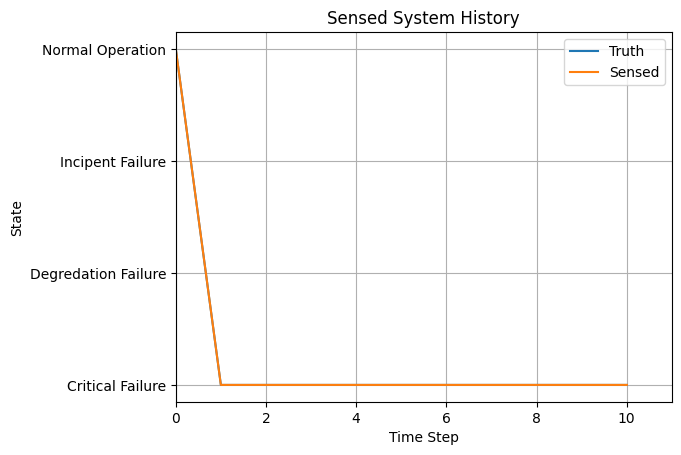

In [ ]:
# defining four components for testing
comp_states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

comp_transition_mat = [[1, 0, 0, 0], 
                       [0.4, 0.6, 0, 0],
                       [0.1, 0.2, 0.7, 0],
                       [0.025, 0.025, 0.05, 0.9]]

sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.02, 0.98]]

# initialize four components with the same transition matrix and states
comp1 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_1')
comp2 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_2')
comp3 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_3')
comp4 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_4')

# create a series system from the components
sys = System('series_system', [comp1, comp2, comp3, comp4])
# sys.simulate(10)
# for i in range(10):
#     sys.simulate(1)
#     print(f"Simulation step {i+1}")
#     sys.outputSystemStates()
#     print("\n")
    
sys.plotHistory()


### Simulating a parallel system

Simulation step 1
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 3     3         
Sensed Component_4 3     3         
series_system 3     3         


Simulation step 2
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 2     2         
Sensed Component_4 3     3         
series_system 3     3         


Simulation step 3
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 2     2         
Sensed Component_4 2     2         
series_system 3     3         


Simulation step 4
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 1     1         
Sensed Component_4 0     0         
series_system 3     3         


Simulation step 5
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component

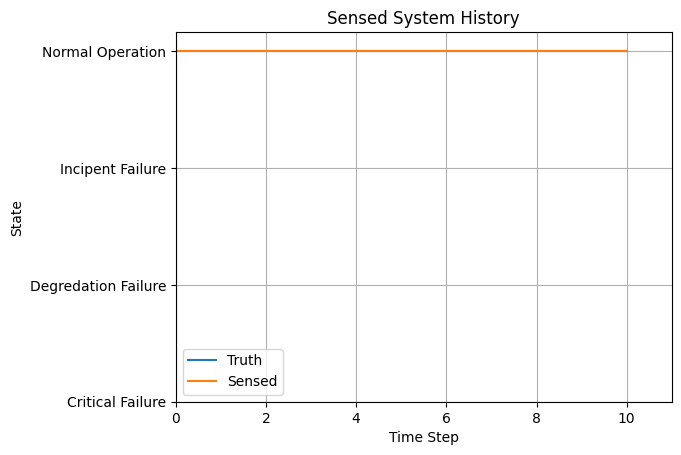

In [ ]:
# defining four components for testing
comp_states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

comp_transition_mat = [[1, 0, 0, 0], 
                       [0.4, 0.6, 0, 0],
                       [0.1, 0.2, 0.7, 0],
                       [0.025, 0.025, 0.05, 0.9]]

sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.02, 0.98]]

# initialize four components with the same transition matrix and states
comp1 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_1')
comp2 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_2')
comp3 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_3')
comp4 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_4')

# create a parallel system from the components
sys2 = System('series_system', [comp1, comp2, comp3, comp4], parallels=[(1,2,3,4)])
# sys2.simulate(10)
for i in range(10):
    sys2.simulate(1)
    print(f"Simulation step {i+1}")
    sys2.outputSystemStates()
    print("\n")
    
sys2.plotHistory()

### Simulating a series-parallel system

Simulation step 1
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 3     3         
Sensed Component_4 3     3         
series_system 3     3         


Simulation step 2
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 3     3         
Sensed Component_4 3     3         
series_system 3     3         


Simulation step 3
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 0     0         
Sensed Component_4 3     3         
series_system 3     3         


Simulation step 4
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component_2 3     3         
Sensed Component_3 0     0         
Sensed Component_4 3     3         
series_system 3     3         


Simulation step 5
Component  State Sensed State
Sensed Component_1 3     3         
Sensed Component

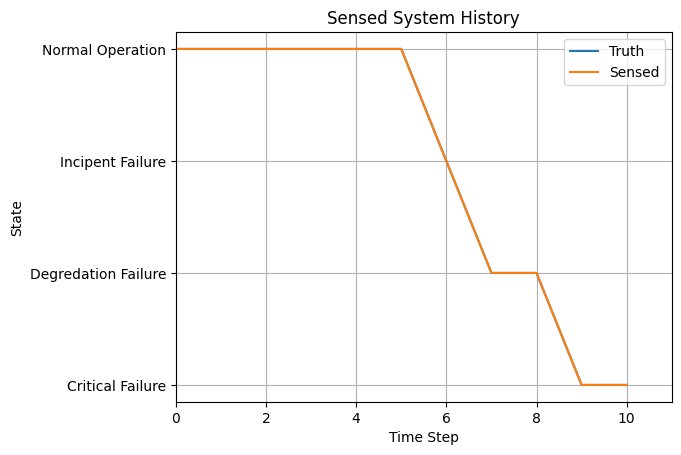

In [ ]:
# defining four components for testing
comp_states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

comp_transition_mat = [[1, 0, 0, 0], 
                       [0.4, 0.6, 0, 0],
                       [0.1, 0.2, 0.7, 0],
                       [0.025, 0.025, 0.05, 0.9]]

sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.02, 0.98]]

# initialize four components with the same transition matrix and states
comp1 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_1')
comp2 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_2')
comp3 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_3')
comp4 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_4')

# create a series system from the components with two parallel branches
sys3 = System('series_system', [comp1, comp2, comp3, comp4], parallels=[(1,2),(3,4)])
# sys3.simulate(10)

for i in range(10):
    sys3.simulate(1)
    print(f"Simulation step {i+1}")
    sys3.outputSystemStates()
    print("\n")

sys3.plotHistory()

Extra Functions, Ideas, and Examples

In [ ]:
from utils.helperFunctions import find_mode

ans = find_mode([3,2,0])
print(ans)

0


In [ ]:
# import pandas as pd

# def export_simulation_history_to_excel(sensed_components, output_file='simulation_history.xlsx'):
#     """
#     Exports the simulation history of sensed components to an Excel file.

#     Parameters:
#         sensed_components (list): List of sensed components with simulation history.
#         output_file (str): The name of the output Excel file.
#     """
#     # Initialize an empty list to store the data
#     history_data = []

#     # Iterate through each sensed component
#     for idx, comp in enumerate(sensed_components):
#         # Assuming each component has a method or attribute `get_history()` that returns its history
#         if hasattr(comp, 'get_history') and callable(getattr(comp, 'get_history')):
#             comp_history = comp.get_history()
#             for entry in comp_history:
#                 # Append the component index and its history to the data list
#                 history_data.append({'Component Index': idx, **entry})
#         else:
#             print(f"Component at index {idx} does not have a 'get_history' method.")

#     # Convert the history data to a DataFrame
#     df = pd.DataFrame(history_data)

#     # Write the DataFrame to an Excel file
#     df.to_excel(output_file, index=False)
#     print(f"Simulation history exported to {output_file}")
    

#     export_simulation_history_to_excel(sys.comps, output_file='simulation_history.xlsx')
    